In [12]:
import requests
import matplotlib
import geopandas as gpd

In [2]:

BASE_URL = "https://s3.amazonaws.com/tripdata/"
month = "202410-citibike-tripdata.zip"
latest_data = requests.get(BASE_URL + month)


In [48]:
# Read in a zipped CSV HTML response
from io import BytesIO
import pandas as pd
from zipfile import ZipFile

first_entry_table = pd.DataFrame()
zip_data = BytesIO(latest_data.content)
csv_filename = None
    # Open the zip file
with ZipFile(zip_data) as zip_file:

    for name in zip_file.namelist():
        if name.endswith('.csv'):
            csv_filename = name
            with zip_file.open(name) as csv_file:
                first_entry_table = pd.read_csv(csv_file, dtype={'start_station_id': str, 'end_station_id': str})
                break   



In [37]:
# One entry with null start_station_id
first_entry_table[first_entry_table.start_station_id.isna()]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
28016,E8AE73DFF51DCC94,electric_bike,2024-10-24 17:50:31.271,2024-10-24 18:08:01.182,NaN,NaN,9 Ave & W 33 St,6492.08,40.74,-74.01,40.752568,-73.996765,casual


In [44]:
# 33 entries with null end_station_id
first_entry_table[first_entry_table.end_station_id.isna()].shape

(33, 13)

In [45]:
def remove_null_stations(df):
    return df[~df.start_station_id.isna() & ~df.end_station_id.isna()]

In [46]:
def reformat_station_ids(row):
    # replace `.` with `_` in start_station_id and end_station_id
    row["start_station_id"] = row["start_station_id"].replace(".", "_")
    row["end_station_id"] = row["end_station_id"].replace(".", "_")
    return row

In [50]:
trips_wo_null_stations = remove_null_stations(first_entry_table)
trips_formatted = trips_wo_null_stations.apply(reformat_station_ids, axis=1)

In [27]:
name_counts = first_entry_table.groupby('start_station_id')['start_station_name'].nunique()
# Two stations with multiple names
print(name_counts.sort_values(ascending=False).head(10))


# Get all station names for start_station_id == 4968.03
station_names = first_entry_table[first_entry_table['start_station_id'] == 4968.03]['start_station_name'].unique()
station_names



start_station_id
4968.03    2
4968.03    2
2782.02    1
6425.04    1
6414.07    1
6416.06    1
6417.11    1
6422.08    1
6422.09    1
6423.03    1
Name: start_station_name, dtype: int64


array(['Bridge St & Water St', 'Bridge St & Front St'], dtype=object)

In [79]:
first_entry_table[first_entry_table.start_station_name == 'W 35 St & 9 Ave']

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
2797,95978DAA4E43CF55,classic_bike,2024-10-24 16:27:24.670,2024-10-24 16:53:33.480,W 35 St & 9 Ave,6569.09,Murray St & West St,5329.08,40.754145,-73.996089,40.715030,-74.012460,member
3485,DB34B5B6208082CF,electric_bike,2024-10-31 10:08:23.394,2024-10-31 10:48:41.939,W 35 St & 9 Ave,6569.09,W 181 St & Riverside Dr,8381.04,40.754145,-73.996089,40.851680,-73.941860,member
3549,10ECF2A287BD3608,electric_bike,2024-10-15 07:23:33.217,2024-10-15 07:28:11.962,W 35 St & 9 Ave,6569.09,12 Ave & W 40 St,6765.01,40.754145,-73.996089,40.760875,-74.002777,member
3560,4742E882D5858383,electric_bike,2024-10-24 08:56:15.228,2024-10-24 09:08:55.000,W 35 St & 9 Ave,6569.09,E 16 St & Irving Pl,5938.11,40.754145,-73.996089,40.735367,-73.987974,member
4288,51A1F3044CEF8C18,classic_bike,2024-10-29 12:20:41.116,2024-10-29 12:25:34.009,W 35 St & 9 Ave,6569.09,12 Ave & W 40 St,6765.01,40.754145,-73.996089,40.760875,-74.002777,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91639,BD4E29A5A36C47F7,electric_bike,2024-10-31 12:55:40.912,2024-10-31 13:01:28.369,W 35 St & 9 Ave,6569.09_,W 35 St & 9 Ave,6569.09_,40.754256,-73.996451,40.754256,-73.996451,casual
102857,B53DB599DF05FA5D,electric_bike,2024-10-16 11:08:46.662,2024-10-16 11:23:24.097,W 35 St & 9 Ave,6569.09,Amsterdam Ave & W 79 St,7311.02,40.754145,-73.996089,40.782939,-73.978652,member
102881,2E31F23B44BF8CC6,classic_bike,2024-10-19 01:22:02.704,2024-10-19 01:33:24.560,W 35 St & 9 Ave,6569.09,W 12 St & Hudson St,5997.10,40.754145,-73.996089,40.737530,-74.005589,casual
111979,51C6703F47D35BBC,electric_bike,2024-10-21 16:23:59.105,2024-10-21 16:36:12.965,W 35 St & 9 Ave,6569.09_,Bank St & Washington St,5964.01,40.754256,-73.996451,40.736197,-74.008592,member


In [74]:
first_entry_table[first_entry_table.start_station_id == '6569.09_']

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
21804,D17D88409E54F951,electric_bike,2024-10-16 17:44:51.417,2024-10-16 17:56:48.592,W 35 St & 9 Ave,6569.09_,Central Park West & W 72 St,7141.07,40.754256,-73.996451,40.775794,-73.976206,member
42317,FFE378D6BF61C632,electric_bike,2024-10-30 18:19:08.393,2024-10-30 18:21:33.116,W 35 St & 9 Ave,6569.09_,9 Ave & W 33 St,6492.08,40.754256,-73.996451,40.752568,-73.996765,member
42352,A62CFA92FB425B88,classic_bike,2024-10-19 21:12:09.635,2024-10-19 21:18:13.990,W 35 St & 9 Ave,6569.09_,W 22 St & 8 Ave,6224.03,40.754256,-73.996451,40.744751,-73.999154,member
91639,BD4E29A5A36C47F7,electric_bike,2024-10-31 12:55:40.912,2024-10-31 13:01:28.369,W 35 St & 9 Ave,6569.09_,W 35 St & 9 Ave,6569.09_,40.754256,-73.996451,40.754256,-73.996451,casual
111979,51C6703F47D35BBC,electric_bike,2024-10-21 16:23:59.105,2024-10-21 16:36:12.965,W 35 St & 9 Ave,6569.09_,Bank St & Washington St,5964.01,40.754256,-73.996451,40.736197,-74.008592,member
119139,AD00F8E2B85A8CC5,classic_bike,2024-10-28 20:55:14.471,2024-10-28 21:15:56.209,W 35 St & 9 Ave,6569.09_,E 63 St & 3 Ave,6830.02,40.754256,-73.996451,40.763954,-73.964600,member


In [80]:
name_counts = first_entry_table.groupby('start_station_name')['start_station_id'].nunique()
# Two stations with multiple names
print(name_counts.sort_values(ascending=False).head(50))


station_names = first_entry_table[first_entry_table['start_station_name'] == 'W 35 St & 9 Ave']['start_station_id'].unique()

start_station_name
W 35 St & 9 Ave                            2
Macon St & Patchen Ave                     1
Macon St & Nostrand Ave                    1
Macon St & Lewis Ave                       1
Macon St & Howard Ave                      1
Macombs Rd & W 175 St                      1
Macombs Rd & Featherbed Ln                 1
Macombs Pl & W 152 St                      1
MacDougal St & Washington Sq               1
MacDougal St & Prince St                   1
MacDonough St & Marcy Ave                  1
MacDonough St & Malcolm X Blvd             1
Louis Nine Blvd & Intervale Ave            1
Lott St & Erasmus St                       1
Loring Pl North & W 183 St                 1
1 Ave & E 110 St                           1
Lorimer St & Broadway                      1
Longwood Ave & Southern Blvd               1
Longfellow Ave & E 165 St                  1
Longfellow Ave & Aldus St                  1
Little West St & 1 Pl                      1
Lispenard St & Broadway             

In [84]:
first_entry_table.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')

In [37]:
# convert all start_station_names to strings
first_entry_table['start_station_id'] = first_entry_table['start_station_id'].astype(str)

In [45]:
first_entry_table[first_entry_table['start_station_id'] == '7293.10'].shape

(327, 13)

In [56]:
# Create a table using the start_station_id and the first encountered start_station_name/start_station_lat/start_station_lng
stations = trips_formatted[
    ["start_station_id", "start_station_name", "start_lat", "start_lng"]
].drop_duplicates(subset="start_station_id")

In [58]:
# convert `stations` to a GeoDataFrame
stations_gdf = gpd.GeoDataFrame(
    stations,
    geometry=gpd.points_from_xy(stations.start_lng, stations.start_lat),
    crs="EPSG:4326",
)

<Axes: >

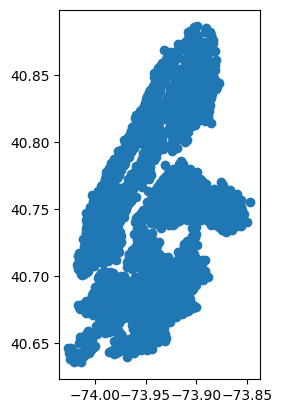

In [55]:
stations_gdf.plot()

In [59]:
stations_gdf.to_file('./stations.geojson', driver="GeoJSON")  


In [69]:
import os
# Create a dataframe which is the count of entries for any given `start_station_id`/`end_station_id` pair
station_pairs = trips_formatted.groupby(["start_station_id", "end_station_id"]).size().reset_index(name="count")
# For each `start_station_id` create a list of `end_station_id` and `count` pairs and write the value to a file with the name of the `start_station_id`
if not os.path.exists("../frontend-citi-bike-data/public/station_data"):
    os.makedirs("../frontend-citi-bike-data/public/station_data")
for station_id in station_pairs.start_station_id.unique():
    station_pairs[station_pairs.start_station_id == station_id][["end_station_id", "count"]].to_csv(f"../frontend-citi-bike-data/public/station_data/{station_id}.csv", index=False)

In [67]:
# Given a station_id, fetch the appropriate file and return the contents as a dataframe
def fetch_station_pairs(station_id):
    return pd.read_csv(f"../frontend-citi-bike-data/public/station_data/{station_id}.csv")
    

In [65]:
fetch_station_pairs("8841_03")

,end_station_id,count
0,8118_02,1
1,8330_05,1
2,8505_08,1
3,8558_01,1
4,8601_04,2
5,8672_05,1
6,8682_06,1
